# SLU13 - Bias-Variance trade-off & Model selection: Learning notebook

In the last units, you have learned about different types of models - like `LinearRegression`, `LogisticRegression` and `DecisionTreeClassifier` - and about metrics which tell you how good or bad is the performance of your model.

In this unit, we'll go one step further and teach you how to analyze more deeply the performance of your models and learn methods that help you to select the best model for your data. We will look at the interplay between model complexity and the bias and variance of the prediction.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import utils

## 1. Bias-Variance trade-off

Let's start with a simple modeling problem. We'll try to answer the following question: 

&emsp;How does the number of hours of TV per day relate to a person's age?

We have some data about it:

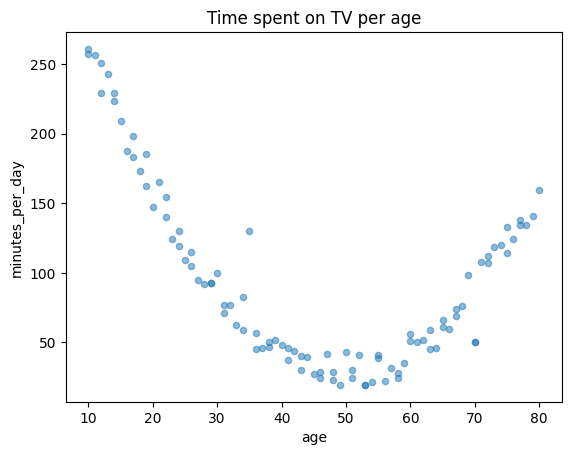

In [2]:
df_1 = utils.generate_time_on_tv(100,130,50)
df_1.plot(kind='scatter', x='age', y='minutes_per_day', alpha=.5, title='Time spent on TV per age');

Great! We can notice there is a clear pattern here. We now want to create a model that predicts the expected time spent watching TV per day for a given age.

### 1.1 Simple model

We will start by using a very "inflexible" model, the simple linear regression (linear regression with just one explanatory variable). Simple linear regression requires the answer to be of the format:

$$ y = \beta x + c $$

We train the model and this is the result (plotted in red):

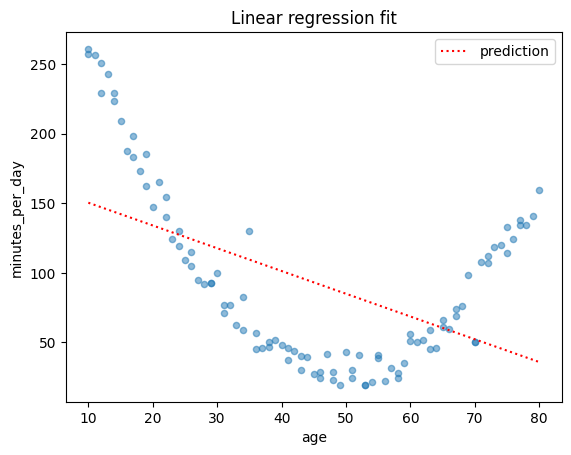

In [3]:
utils.fit_lin_reg(df_1)

This doesn't look too good. Maybe this model is too simple? Let's try a more complex model.

### 1.2 Complex model
You don't know so many models yet, so you ask your colleague for a suggestion and she gives you code for another model. You try it out and the result is this:

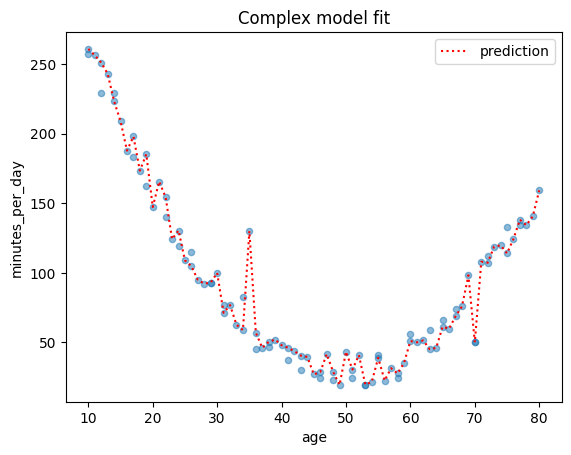

In [4]:
utils.fit_complex_model(df_1)

Well that's no good either! The model just followed the data like an idiot. But now it's time to go home and pick up your kid from the kindergarten, so you decide to give it another try tomorrow and call it a day.

### 1.3 Another try and compare the results
It's another day and you realize that this dataset has a second page. You plot it and see that it's more or less the same.

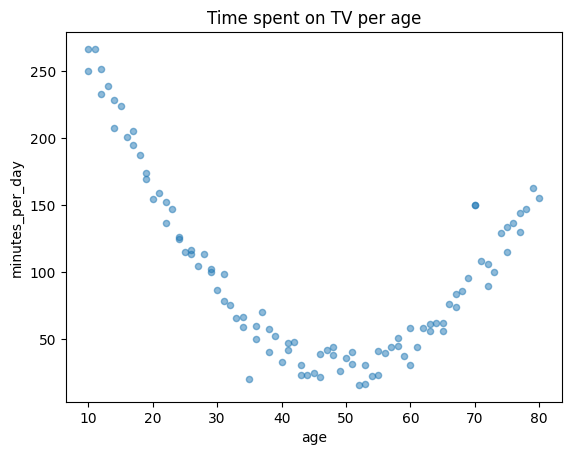

In [5]:
df_2 = utils.generate_time_on_tv(200,20,150)
df_2.plot(kind='scatter', x='age', y='minutes_per_day', alpha=.5, title='Time spent on TV per age');

You fit this dataset again with the same two models as yesterday and look at all the results, hoping to understand what is going on:

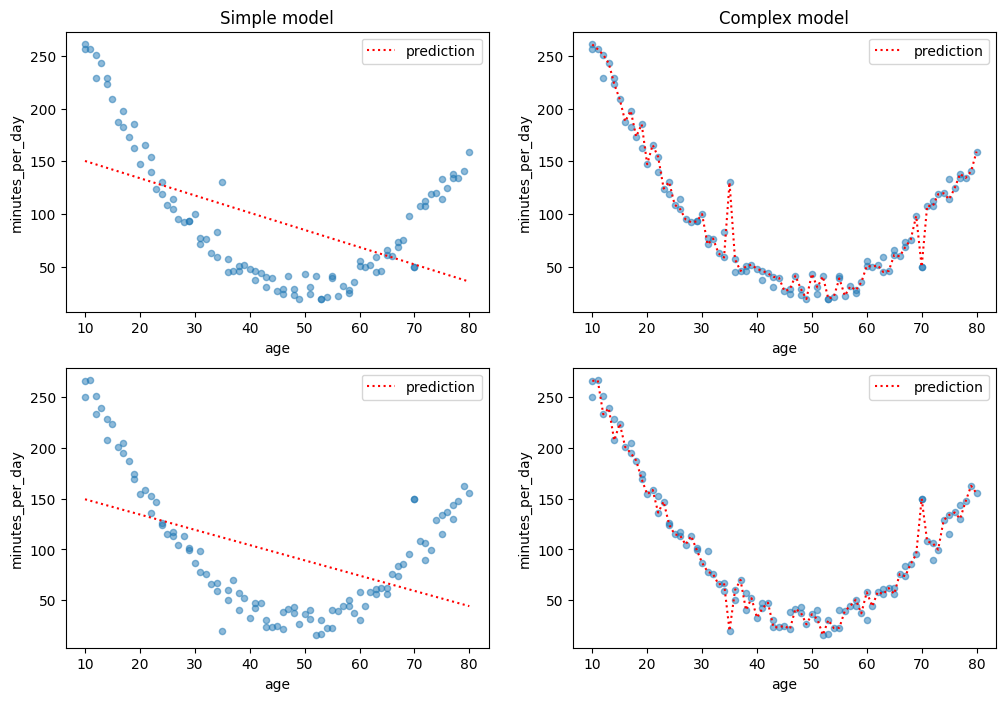

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
utils.fit_lin_reg(df_1, ax=axs[0,0])
axs[0,0].set_title('Simple model')
utils.fit_lin_reg(df_2, ax=axs[1,0])
axs[1,0].set_title('')
utils.fit_complex_model(df_1, ax=axs[0,1])
axs[0,1].set_title('Complex model')
utils.fit_complex_model(df_2, ax=axs[1,1])
axs[1,1].set_title('');

So what do we make out of this? We still see two bad models, one completely off and the other one blindly following the data.

But, the models are wrong in different ways.

The prediction of the simple model has a very high **bias** - it is very far from the data points. This is a problem because the prediction does not describe the shape of the data at all.

The prediction of the complex model has a high **variance** - it follows the data points too exactly, so everytime we move the data points a little, the prediction changes considerably. This is a problem because the prediction describes the data including the noise.

Here is an illustration of bias and variance using dart-throwing (from [here](http://scott.fortmann-roe.com/docs/BiasVariance.html)).

![dart_throwing_bias_var_tradeoff](media/dart_throwing_bias_var_tradeoff.png)

Ideally, we'd like to train our model to give a prediction that **generalizes** well - it captures the shape of the data, but doesn't get fooled by noise. Such a prediction would have a low bias and a low variance.

Moreover, such a well-trained model would produce good predictions not only on training data, but also on test (unseen) data. Remember that the main purpose of training models it to use them to predict for new unseen data with unknown labels. A model that works just on the training data is useless.

* When the prediction has too much bias, the model did not learn enough to be accurate on seen (training) data or on unseen (test) data. It is **underfitting** the data.
* When the prediction has too much variance, the model may have high accuracy on training data, but it loses its power to generalize to unseen data. It is **overfitting** the training data and performing badly on test data.

## 2. Generalization error

Generalization error is the error that the model makes on independent test data, the error that we ultimately want to minimize. The generalization error encompasses bias, variance, and irreducible error. In this section, we will delve into each of these components and investigate their interplay and impact on model performance.

Understanding the three error components aids in pinpointing the source of the error and subsequently in refining the model. As we will see, dealing with bias and variance is really about underfitting (high bias) and overfitting (high variance).

### 2.1 Bias and underfitting

High bias stems from overly simplistic assumptions about the data, using models that cannot capture all the complexity present in the data. Such models can lead to underfitting, where the model is too rigid to capture the underlying patterns in the data. As in our TV example, when we were trying to fit non-linear data with a linear model.

High bias is learning the wrong thing, skewing predictions far off from the real values.

Fixing high bias requires adding complexity to our models (for instance adding more parameters) to allow them to adapt better to the data. To reduce bias, we can take the following steps:

- Add more features: Including more relevant features can help the model capture the complexity of the data.
- Increase model complexity: Switching to a more complex model or adding parameters to the current model can help it fit the training data better.
- Reduce regularization: Regularization adds a penalty for more complex models. Reducing this penalty can allow the model to fit the data more closely. (More about regularization in later SLUs.)

### 2.2 Variance and overfitting

In contrast to bias, high variance arises when the model is excessively flexible, overreacting to the specifics of the training data (including the noise).

Variance creeps in when we have more parameters than justified by the data and learn random things from different training samples.

Fixing high variance requires decreasing complexity to prevent the model from adapting too much to the training data. To reduce variance, we can:

- Add more training data: More data can help the model generalize better, reducing overfitting.
- Reduce model complexity: Simplifying the model or reducing the number of parameters can prevent it from fitting the training data too closely.
- Increase regularization: Regularization can help prevent the model from becoming too complex, thus reducing variance.

### 2.3 Irreducible error

Irreducible error is the portion of the error that cannot be eradicated regardless of the model's sophistication. It is a reflection of the noise in the data.

### 2.4 Generalization error and the bias-variance trade-off

The relationship between bias, variance, and model complexity is characterized by a trade-off. As model complexity increases, bias tends to decrease, while variance tends to increase, and vice versa.

![bias_variance_trade_off](media/bias_variance_trade_off.png)

In theory, we reach the right level of complexity when the increase in bias is equivalent to the reduction in variance:

$$ \frac{dBias}{dComplexity} = - \frac{dVariance}{dComplexity} $$

In practice, there is not an analytical way to find this location, but there are many experimental procedures which we will explore in section 3.

### 2.5 Sources of model complexity

Model complexity is influenced by various factors, such as the number of features and the nature of the relationship between variables. Examples of factors that contribute to model complexity include:

* The number of features: the more features we have, the more parameters we add to the model to account for these features. If you write the equation of a linear model for example, it should be evident that the number of weights (parameters) grows with the number of features:

$$ y = \beta_1 x_1 + \beta_2 x_2  + \beta_3 x_3  + \beta_4 x_4  + ... + c $$

* Increasing the polynomial degree: even when we have just one feature, increasing the order of the equation leads to a more complex model and, once again, with each order above the first one comes an increase in the number of used parameters and a non-linear aspect:

$$ y = \beta_1 x + \beta_2 x^2  + \beta_3 x^3  + \beta_4 x^4  + ... + c $$

* Using complex non-linearities: a lot of recent models introduce not only huge numbers of parameters but different ways of combining them in a non-linear way that increases the flexibility of the model. An example of this are the modern deep learning models used for very complex modern problems (such as images, language, sound).

## 3. Model Selection

Now that you know about the potentials of underfitting or overfitting your data, we're going to look into ways to avoid these pitfalls.

We'll change the scene and use data about craft beer to try to predict whether a particular beer is an [India Pale Ale (IPA)](https://en.wikipedia.org/wiki/India_pale_ale).

We have two features:
* `IBU`, which stands for International Bitterness Units and is a measure of bitterness
* `Color`.

Our target is `IsIPA` which is just 1 or 0. Yes, you guessed it right, this is a classification problem (unlike the first example which was a regression problem).

![beer](media/beer.jpg)

In [7]:
data = pd.read_csv('data/beer.csv')
data.head(n=3)

,Color,IBU,IsIPA
0,-0.652164,-0.970233,0
1,-0.377297,1.387356,1
2,0.183752,0.442296,0


Let's get a quick idea of how the target varies with the features: 

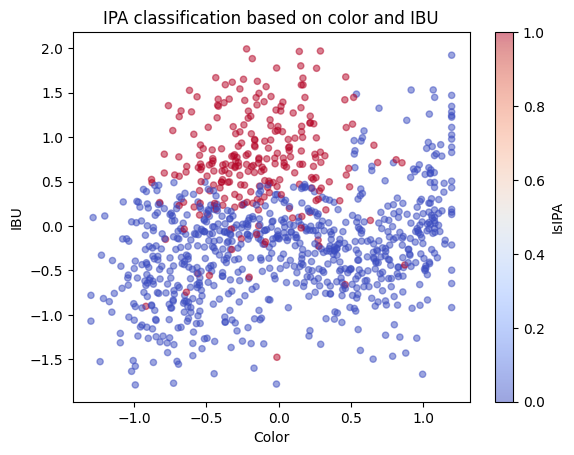

In [8]:
X = data[['Color', 'IBU']]
y = data['IsIPA']  # <--- to be an IPA or not to be an IPA, that is the question 

data.plot(kind='scatter', x='Color', y='IBU', c='IsIPA', colormap='coolwarm', alpha=.5, sharex=False)
plt.xlabel('Color')
plt.ylabel('IBU')
plt.title('IPA classification based on color and IBU');

### 3.1 Train-test split (holdout method)

As we said, we train our models on known data for the purpose of predicting for data with unknown labels. Clearly, is is difficult to evaluate a model on data where we don't know the true target, so we have to use a small trick. We will separate our training data into two parts: 
- the **training set** where we will train our model
- the **test set** where we will estimate the generalization error.

<img alt="hold_out_method" src="media/hold_out_method.png" width="400">

The basic workflow goes like this:
1. Train a few models on the training set, including one very simple model as your baseline.
2. Make predictions on the training set and calculate a metric. This will show you which model describes the training data well.
3. Make a prediction on the test set and calculate a metric. This will show you if the model describes the test data well.
4. Compare the metrics and choose the best model - one that performs well on both training and test sets and does not overfit or underfit.

![train_test_set](media/train_test_split.png)

Although there are other, more sophisticated approaches to measuring generalization power of machine learning models, from a basic data science perspective, having a held-out test set that is only used at the end of the process is one of the most sacred concepts. 

Someone brilliant (and whose name I can't recall) once said:

> "Every time you use your test set your data dies a little."

That is because every time you use your test set you lose the ability to tell whether you are overfitting the data you happen to have at hand. 

Scikit-learn has some amazing functionality to help you with model selection. Here we are importing the data scientist's best friend, `train_test_split`. This function randomly assigns data points to the train or test set.

In [9]:
from sklearn.model_selection import train_test_split

# You can specify the percentage of the full dataset you want to reserve for testing, here we are using 40%
# Setting the random state fixes the randomness of train/test split so the sets are reproducible 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"Number of observations:\nTrain: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Number of observations:
Train: 600 | Test: 400


### 3.2 Training
We are going use three different classifiers to model the type of beer (isIPA) based on `Color` and `IBU`:

- `SuperConservative` - a very simplistic model, which we expect to have **high bias**.
- `SuperFlexible` - a complex model that should have very **high variance**.
- `WellBalanced` - a model that should be juuuust right.

We will plot the decision boundary between the classes and we'll compute the accuracy of each of our models to see which model is indicated as the best one.

#### 3.2.1 `SuperConservative` (high bias) 

For our `SuperConservative` model we will use the `Logistic Regression`. 

Logistic regression makes a lot of assumptions about the form of the target function (like having a linear boundary between the classes). We expect the prediction to have a high bias because our data does not seem to follow this assumption.

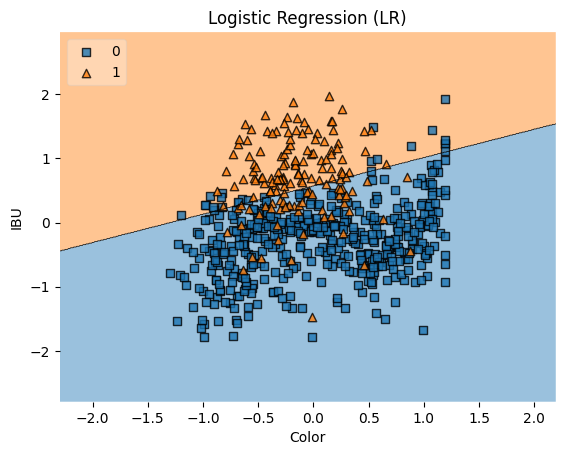

In [10]:
preds_super_conservative = utils.plot_super_conservative(X_train, y_train)

Let's check the accuracy too.

In [11]:
accuracy_score(y_train, preds_super_conservative)

0.8766666666666667

It actually doesn't do too badly, but, when we look at the right side of our plot, we can tell that it probably should be blue all the way to the top, right? 

Let's try a model with tons of flexibility next!

#### 3.2.2`SuperFlexible` (high variance)  

For our super flexible model, we will use a `k-Nearest Neighbors` with k=1.

The k-Nearest neighbors algorithm provides great flexibility and does not assume much underlying structure in the data. The kNN model is explained in the optional SLU19. The *k* is the number of neigbors that the model considers during training. For now just know that with increasing *k* the model becomes less flexible.

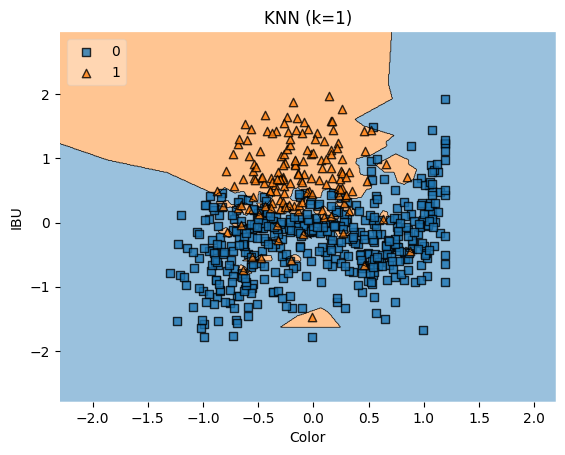

In [12]:
preds_super_flexible = utils.plot_super_flexible(X_train, y_train)

Oh. Right. It definitely figured out that the top right of the plot is blue, but it also did some pretty crazy things. It's pretty clear that it's fitting noise. The small orange pockets show that our model is over adapting to the training data.

What about the accuracy?

In [13]:
accuracy_score(y_train, preds_super_flexible)

1.0

It looks like the model has perfect accuracy, but when we look at the decision regions we know that this is not a "good" model. We will see how to reconcile these seemingly conflicting ideas in a bit.

#### 3.2.3 `WellBalanced` (sort of better)

For the well balanced model, we will use a `K-Nearest Neighbors` with k=9.

A key part of the kNN algorithm is the choice of the hyperparameter *k*: the number of nearest neighbors on which to base the prediction.

Increasing *k* results in considering more observations in each prediction and makes the model more conservative, for good effect.

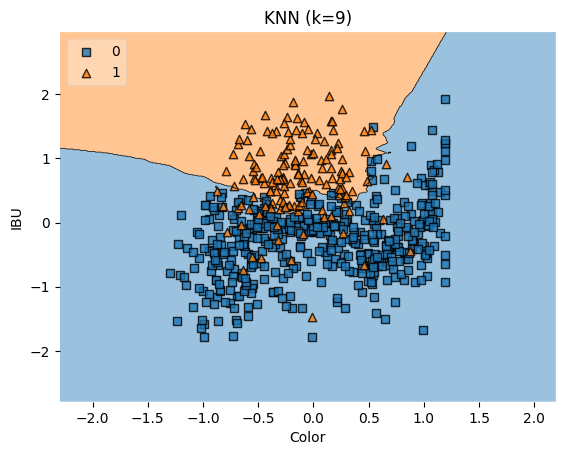

In [14]:
preds_just_right = utils.plot_just_right(X_train, y_train)

Accuracy:

In [15]:
accuracy_score(y_train, preds_just_right)

0.9283333333333333

#### 3.2.4 So... how do we choose? 

The irony is that while the `SuperFlexible` model has perfect accuracy, it's not the "best" model by looking at the decision regions. There are two other measures that help us choose the best model - the in-sample and the out-of-sample error.

### 3.3 In-sample-error (ISE) or training error

The in-sample-error is how well our model performs on the training data.

We have already measured the accuracy and now we will look at it from the other side and measure the error rate. The simplest error rate is the fractions of misclassified cases.

Let's now reveal our three classifiers and calculate the in-sample-error for each: 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clfs = {'SuperConservative': LogisticRegression(),
        'WellBalanced': KNeighborsClassifier(n_neighbors=9),
        'SuperFlexible': KNeighborsClassifier(n_neighbors=1)}

In [17]:
def classification_error(clf, X, y):
    y_pred = clf.predict(X)
    error_rate = 1 - accuracy_score(y, y_pred)
    return round(error_rate * 100, 2)

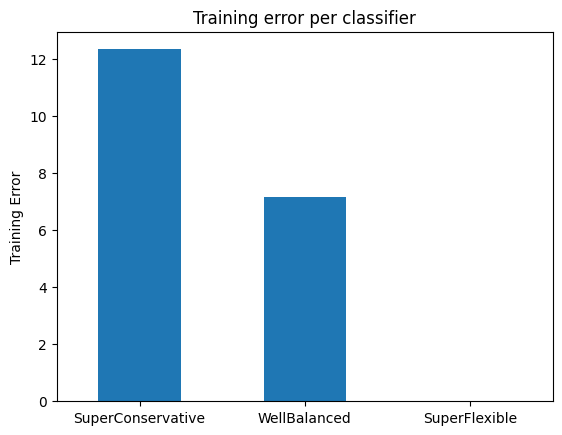

In [18]:
training_error = {}
for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error[key] = classification_error(clf, X_train, y_train)

pd.Series(training_error).plot(kind='bar', rot=0)
plt.ylabel('Training Error')
plt.title('Training error per classifier');

I mean, clearly the `SuperFlexible` model is the best one! Right? (Wrong, as we've seen before.)

Testing our model's performance only on the training data is a common mistake and not a good estimate of the generalization error. The training error is typically smaller than the generalization error.

Next, we'll measure the out-of-sample error of each of the models. 

### 3.4 Out-of-sample error (OSE) or testing error

The out-of-sample error measures how well the model performs on previously unseen data and if it's picking up patterns that generalize well.

The ideal scenario is when both training and test errors are low and close to one another.

* *Underfitted* models tend to perform poorly on both train and test data, having large (and similar) in-sample- and out-of-sample errors.

* *Overfitting* is detected when a model performs well on training data but not quite so well in the test set: the bigger the gap, the greater the overfitting.

See the graphic below for how training and test errors behave in regards to model complexity, bias, and variance.

![train_test_error](media/train_test_error.png)

But okay, let's see how our models perform on the test set.

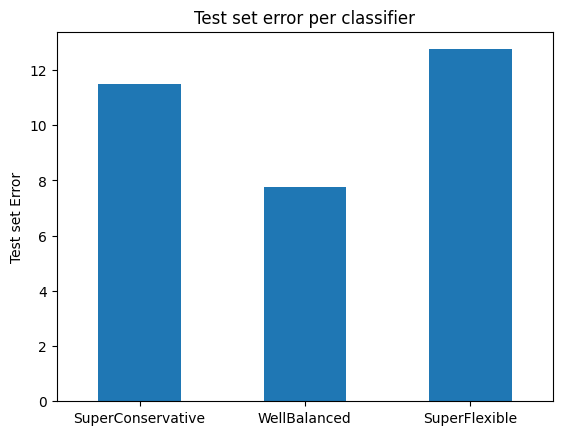

In [19]:
test_set_error = {}
for key, clf in clfs.items():
    test_set_error[key] = classification_error(clf, X_test, y_test)

pd.Series(test_set_error).plot(kind='bar', rot=0)
plt.ylabel('Test set Error')
plt.title('Test set error per classifier');

We can now see that the `SuperFlexible` model actually performs much worse in data that the model hasn't seen! This matches what we've seen in the plots.

So the first big guideline you should take from this is: **Always evaluate your model on a separate set of data that it has never seen**. This set - called **test set** - will produce a more accurate estimate of the generalization error - the **test error** - which will be the base to perform proper model selection.

To resume, we will compute the classification error on both the train and test sets for each model.

In [20]:
def compute_metrics(X_train, y_train, X_test, y_test, clf):
    training_error = classification_error(clf, X_train, y_train)
    test_error = classification_error(clf, X_test, y_test)
    return training_error, test_error

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
    print(f'---\n{key} error:\nTrain: {training_error}% | Test: {test_error}%')

---
SuperConservative error:
Train: 12.33% | Test: 11.5%
---
WellBalanced error:
Train: 7.17% | Test: 7.75%
---
SuperFlexible error:
Train: 0.0% | Test: 12.75%


To quickly recap, SuperConservative has high bias and has both high train and test error. It is underfitted.

SuperFlexible has high variance and has low train but high test error. It is overfitted.

WellBalanced has a balance of bias and variance and has relatively low train and test error. It is well-fitted.

Now that we have chosen the best model, the final step in the process is to retrain the selected model on all the data. Then you are ready to go and use it for predictions on data with unknown labels. Let's do that here:

In [21]:
clf = clfs['WellBalanced']
clf.fit(X,y)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


The train-test-split was the simplest model selection method that we know and the minimum that you should do when selecting a model. Next we'll look at two more model selection methods - the use of a validation set and the k-fold cross-validation.

### 3.5 Validation set

After exploring the train-test split method, you might be wondering if there's a way to further optimize our model's performance. This brings us to the concept of a validation dataset. 

While the train-test split gives us a good estimate of our model's out-of-sample error, a validation set can be used to fine-tune the model's hyperparameters, like the k in the kNN model, before we make our final evaluation. This extra step can be crucial in achieving the best possible model performance. Let's delve deeper into how we can effectively utilize a validation set, given we have enough data.

To use a validation set, we simply split our data into three parts:

![validation_set](media/validation_set.png)

Here is the model selection workflow with test, validation and training sets. The training and validation steps can be repeated until we are happy with our model selection.

![validation_split](media/validation_split.png)

To create a validation set and a test set, we use `train_test_split` twice! For this example, we will use a 60-20-20 split for the train, validation, and test sets, respectively.

In [22]:
# First separate how much data you want to reserve for val + test, we are using 40% again
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
# Then separate the reserved val + test set, typically they are the same size so we are using 50%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1234)
del X_temp, y_temp

print(f"Number of observations:\nTrain: {X_train.shape[0]} | Test: {X_test.shape[0]} | Validation: {X_val.shape[0]}")

Number of observations:
Train: 600 | Test: 200 | Validation: 200


You might be wondering, how is this validation set different from the test set? Don't we basically just have two test sets?

Typically, a validation set will be used to tune the hyperparameters of the model, and then final evaluation of OSE will be done on the test set. 

To demonstrate this, we will use the validation set we created above to find the optimal value of the hyperparameter *k* for our KNN classifier. 

Below we train the kNN model with 1 to 20 neighbors and plot the train and validation errors.

In [23]:
# store the errors
error_dict = {}
# store the classifiers so we can retrieve the best one later
clf_dict = {}
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_error, validation_error = compute_metrics(X_train, y_train, X_val, y_val, knn)
    error_dict[k] = {'train_error': train_error, 'validation_error': validation_error}
    clf_dict[k] = knn

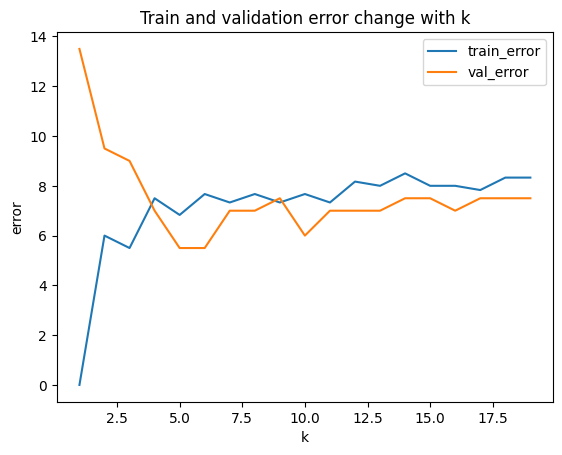

In [24]:
plt.plot(list(error_dict.keys()), [d['train_error'] for d in error_dict.values()], label='train_error')
plt.plot(list(error_dict.keys()), [d['validation_error'] for d in error_dict.values()], label='val_error')
plt.title('Train and validation error change with k')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();

Judging by the graph, it looks like `k=5` is actually the best! This is where the validation error reaches a minimum. Now we will retrain the selected model on the train+val set and use the fitted model to evaluate the prediction error on the test set.

In [25]:
k = 5
knn_5 = clf_dict[k]
knn_5.fit(pd.concat([X_train,X_val]), pd.concat([y_train,y_val]))
test_error = classification_error(knn_5, X_test, y_test)
print(f'KNN, k=5 error:\nTrain: {error_dict[k]["train_error"]}% | Validation: {error_dict[k]["validation_error"]}% '\
      f'| Test: {test_error}%')

KNN, k=5 error:
Train: 6.83% | Validation: 5.5% | Test: 7.0%


This is pretty cool! We were able to tune the parameter *k* on our validation set, and the OSE (test error) actually dropped from the `WellBalanced` (k=9) model we trained before!

### 3.6 K-fold cross-validation

Test and validation error results can be subject to great variability, especially for smaller datasets, depending on how we split the data (i.e., which observations go to train and which go to val/test).

Also, and quite obviously, holding out *more* data reduces the amount available for training, possibly leading us to *overestimate* the test error.

One way to mitigate this is to use k-fold cross validation.

In k-fold cross validation:
1. We divide the sample into a train and test set.

1. The train set is randomly partitioned into k equal parts, or subsamples.

1. Each time, we leave out one part, fit the model to the other k-1 subsets combined into a single dataset, and then test the model against the left out part. This gives us one validation error.

1. This is done for each of the k parts and then the results are combined, for example by calculating the mean of the k validation errors.

See below an illustration for k=5.

![cross_validation](media/cross_validation.png)

This way, we use every observation to both train and validate the model: each fold is used once as validation, while the k-1 remaining folds form the training set.

The mean of the error of every fold can be seen as a proxy for OSE.

As the simple validation set methods, the k-fold cross-validation can be used to tune a hyperparameter. The important point is to always keep a separate test set that is used only at the end.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Again, scikit-learn already has cross validation implemented for us!

This example is a bit confusing because we have two parameters called k - the number of neighbors in the kNN model and the number of folds in k-fold cross-validation. In the code below, we use the `k` parameter to define the number of neighbors and the `cv` parameter to define the number of folds.

In [27]:
from sklearn.model_selection import cross_val_score

# store the mean and variance of the validation error
mean_error_list = []
var_error_list = []
# k here is the kNN hyperparameter, the number of neighbors
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    # The number of folds in the cross-validation is the cv parameter
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring=classification_error)
    mean_error = round(np.mean(scores), 2)
    var_error = round(np.var(scores), 2)
    mean_error_list.append(mean_error)
    var_error_list.append(var_error)
    print(f'---\nValidation error for {k} neighbors kNN:\nMean: {mean_error}% | Variance: {var_error}')

---
Validation error for 1 neighbors kNN:
Mean: 12.5% | Variance: 18.44
---
Validation error for 2 neighbors kNN:
Mean: 9.75% | Variance: 9.31
---
Validation error for 3 neighbors kNN:
Mean: 8.62% | Variance: 7.95
---
Validation error for 4 neighbors kNN:
Mean: 9.0% | Variance: 5.56
---
Validation error for 5 neighbors kNN:
Mean: 7.88% | Variance: 5.02
---
Validation error for 6 neighbors kNN:
Mean: 8.38% | Variance: 6.58
---
Validation error for 7 neighbors kNN:
Mean: 8.25% | Variance: 5.38
---
Validation error for 8 neighbors kNN:
Mean: 8.0% | Variance: 6.31
---
Validation error for 9 neighbors kNN:
Mean: 8.5% | Variance: 4.31


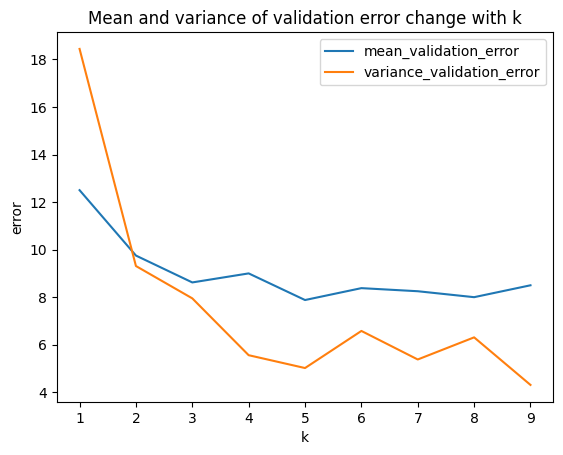

In [28]:
plt.plot(range(1,10), mean_error_list, label='mean_validation_error')
plt.plot(range(1,10), var_error_list, label='variance_validation_error')
plt.title('Mean and variance of validation error change with k')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();

We can see that both the mean and the variance of the validation error stabilize around 5 neighbors. Nonetheless, since each training set contains just part of the data, the OSE error estimated from the validation error can still be biased upward.

Finally, we can calculate the test set error on the test set that we reserved previously. Importantly, the cross-validation doesn't return the trained classifier, just the scores, so we have to train the model again and we do it on the whole training set.

In [29]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
test_error = classification_error(knn_5, X_test, y_test)
print(f'KNN, k=5 error:\nMean validation error: {mean_error_list[4]}% '\
f'\nVariance validation error: {var_error_list[5]}% '\
f'\nTest error: {test_error}%')

KNN, k=5 error:
Mean validation error: 7.88% 
Variance validation error: 6.58% 
Test error: 6.0%


### 3.7 Data leakage

Data leakage occurs when information from outside of the training dataset is used to create the model, resulting in a model that is not truly representative of the real world and could potentially give overly optimistic performance estimates. This typically happens when knowledge about the test set leaks into the training process, which could include data preprocessing, feature engineering, and model training.

For example, imagine you are building a model to predict pandas migration to different bamboo forest areas. You evaluate the environmental conditions of each forest area and predict to which area the pandas go. If your model accidentally has access to future data about where pandas actually migrated, it will perform exceptionally well during testing, but it will likely fail in real-world scenarios because it used future information it should not have had.

To prevent data leakage, we must strictly keep the test data separate from the training data during the entire modeling process. Data leakage can be hard to detect, but if your results seem a little too good to be true, that's one sign. Ways to combat data leakage include:

* Perform data preparation within your cross validation folds.
* Hold back a test dataset for a final sanity check of your developed models.

## 4. Practical considerations

In addition to choosing models based on their performance, there are practical considerations that data scientists need to factor in into model selection. It is important to always keep your business case in mind and consider if factors like speed and memory usage are more important than that extra 0.1% in accuracy. 

### 4.1 Training time

Sometimes the "best" models can take a long time to train (for certain deep learning models, it can be as long as a few days or weeks). We need to consider if the business case warrants waiting for the results this long.

It is best practice to work towards a quick baseline, or **MVP** (Minimum Viable Product), with a simple model, and then iterate to improve it.

Oftentimes a simple model will be quick to train and still yield decent performance.

Furthermore, if your data is noisy, or if there is too much irreducible error, the most complex and advanced models will not be able to "learn" much more than a simple model anyway. So, it is better to try something quick before wasting time trying to train a complex model just to find out that there is too much noise.
  
### 4.2 Prediction time

The time your model takes to return predictions is also very important, especially in production environments. Sometimes you need real time predictions and so very fast models.

Again, you need to consider your use case and decide what prediction time is reasonable (i.e., do you need real-time predictions??).

You can have a near-perfect model, but if it takes 30 seconds to return a prediction for one sample, a slightly worse model that takes 0.1 seconds for prediction might be better.

### 4.3 Memory (and $$$)
Some complex models (again, deep learning models are a good example) occupy a lot of disk space and/or require a large amount of memory (RAM)

These factors not only play into prediction time but can translate to actual costs for your business.

Training and then serving heavy models in production may require more expensive machines that can impact margins!

### 4.4 Baselines and starting simple

Usually in the process of solving a problem through data science, you start by building a first simple model to get an idea of the overall performance to expect from the task. You will learn more about this in SLU17, but usually we call this a **baseline**. This baseline acts as an initial performance indicator and can help you look into the errors and understand more about the task. 

A good rule of thumb to avoid running into issues and doing proper model selection is to start simple, that is, start with the simplest model that you can think of for your baseline.

## 5. Learning Curves

Now that you know how to properly evaluate a model and select the best one, let's delve into how to optimally utilize your dataset. Imagine you have access to a vast amount of data and find yourself contemplating:

&emsp;How much data should we use for training?

The obvious starting point about which data to use is... "why not just all of it?"

However, this is not always the best approach, and there are a few possible scenarios where it may actually be a pretty bad idea. Things to consider are:

1. **Modeling efficiency:** Excessive data can significantly slow down the modeling process.
2. **Data acquisition costs:** Obtaining data can be costly.
3. **Sample bias:** Your dataset might exhibit sample bias, not accurately representing the population. In that case you'd have to select a representative sample from all your data.
4. **Data redundancy:** Your model might not benefit from additional data beyond a certain point.

For example, if you have terabytes of data, your model might plateau in performance after processing just the first 100MB. Investing time and resources in extended training might not yield proportional benefits. Knowing if your model has "converged" will help with this.

Data can be expensive to acquire, and you need to know if you have enough. If you are training a model to distinguish between different types of birds, getting training data may be expensive, and a legitimate question may be _"do we have enough data, or do we need to send Paul to South America with a camera again?"_

Moreover, sample bias can be a critical factor. In a medical application, your model might improve with more examples of one gender but not the other. Or, in election modeling, if most of your survey respondents are over 50, but the actual average age of voters is 30, you might need to adjust your training dataset to reflect reality.

To navigate these complexities, we can use learning curves, a powerful tool offered by scikit-learn under `sklearn.model_selection.learning_curve`. A learning curve plots the performance of a classifier across different dataset sizes, helping you discern the point of diminishing returns when adding more data.

These learning curve examples show the training score (blue) and the cross-validation score (green) as they change with increasing training set size (from [here](https://www.dataquest.io/blog/learning-curves-machine-learning/)).

![learning_curve_error](media/learning_curve_error.png)

What you are looking for is a place where the training and cross-validation scores stabilize in good values. After that dataset size, you are not gaining much more value from increasing the amount of data.

But enough chitchat, let's look at some real learning curves! 

Let's use a very, very deep decision tree and see if we can spot the overfit.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

dt = DecisionTreeClassifier(max_depth=200,       # go as far as you like 
                            min_samples_leaf=2)  # and just keep 2 samples in each leaf

And now... the learning curve! 

Note that unlike in the image before, in these learning curves we're using the ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score, where higher is better, and the train and test curves are therefore in opposite positions.

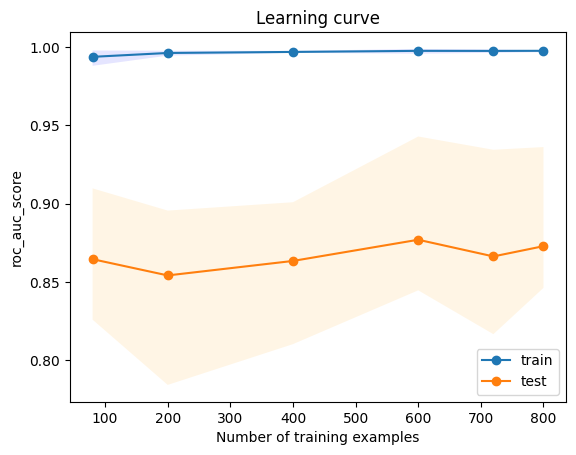

In [31]:
lc = learning_curve(    
    estimator=dt,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]
score_times  =    lc[4]

# note: this function is custom for this learning unit, but feel free to use it  
utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

Spend a couple of minutes looking at the chart, and the axis labels. 

This is an example where the training score is always extremely high, but the test score is not that great. We can suspect that the tree simply made "paths" for each example in the training set, and while some of those worked in the test set, it was never that great. 

Now for the exact same thing, but forcing the tree to have at least 30 examples in each leaf

In [32]:
dt = DecisionTreeClassifier(max_depth=200,       # go as far as you like 
                            min_samples_leaf=30) # but now you need 30 samples 

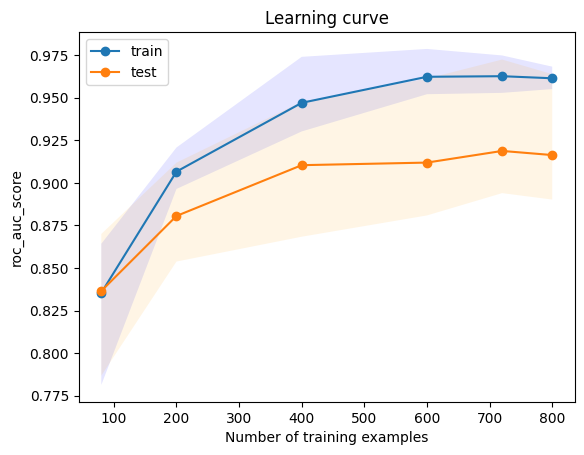

In [33]:
lc = learning_curve(    
    estimator=dt,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]  # we won't show example of training time because the dataset 
score_times  =    lc[4]  # is so tiny, but you can check these out for yourself 

utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

That's a lot better! The training score is never perfect, but the test score follows it quite closely. 

How about a gradient boosting classifier? 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gcb = GradientBoostingClassifier(max_depth=3, min_samples_leaf=40)

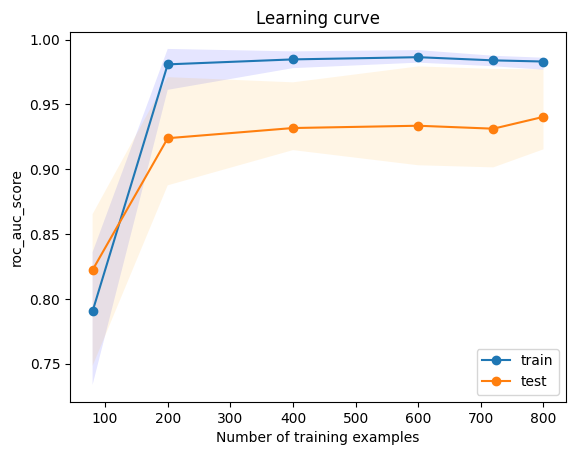

In [35]:
lc = learning_curve(    
    estimator=gcb,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]
score_times  =    lc[4]

utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

Here we actually see an interesting thing, which is that the classifier had mostly stabilized after a few hundred training examples. If examples were really expensive to come by, we may confidently say that we don't need to get any more, as the classifier has converged. 

Thank you for finishing this learning notebook! Hopefully you now have a better idea of:
1. How to choose the best models, optimizing for both bias and variance and keeping practical considerations in mind.
2. Different techniques to separate your data into train and validation/test sets, and the benefits and drawbacks of each.
3. What is overfitting, why it's bad, and some ways to combat it with evaluation techniques.
4. What is a learning curve, how to plot it and interpret it.

So go check out the exercise notebook! 